In [67]:
%matplotlib widget

from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np
from pyScurveGenerator import *

In [68]:

pos_1 = [0,0,2]
pos_2 = [1,1,1]
pos_3 = [2,0,0]
pos_4 = [3,1,1]
pos_5 = [4,0,2]

X1 = np.eye(4)
X2 = np.eye(4)
X3 = np.eye(4)
X4 = np.eye(4)
X5 = np.eye(4)


X1[0:3,3] = pos_1
X2[0:3,3] = pos_2
X3[0:3,3] = pos_3
X4[0:3,3] = pos_4
X5[0:3,3] = pos_5

Tf = 5 #sec
N = 1000
traj1 = np.array(CartesianTrajectory(X1, X2, 5, 1000, 5));
traj2 = np.array(CartesianTrajectory(X2, X3, 5, 1000, 5));
traj3 = np.array(CartesianTrajectory(X3, X4, 5, 1000, 5));
traj4 = np.array(CartesianTrajectory(X4, X5, 5, 1000, 5));

traj = np.r_[traj1,traj2,traj3,traj4]



In [69]:
x_list = [x for x in traj[:,0,3]]
y_list = [y for y in traj[:,1,3]]
z_list = [z for z in traj[:,2,3]]


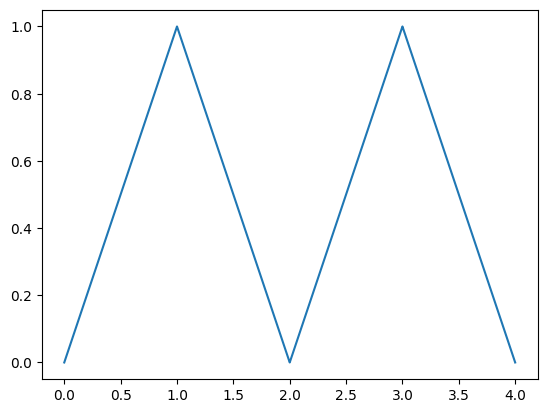

In [70]:
%matplotlib inline

plt.plot(x_list,y_list)
plt.subplot(111)

plt.show()

In [71]:
Points = [pos_1,pos_2,pos_3,pos_4,pos_5]
weights = [1,5,1,5,1]
bc = BezierCurve(Points,weights,N)

In [72]:
P,P_prime,P_two_prime= bc.get_bazier_curve()

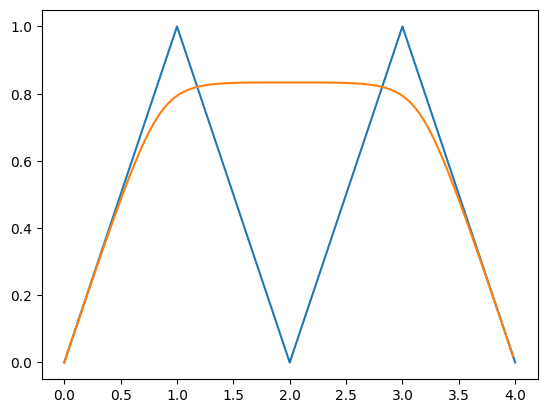

In [73]:
%matplotlib inline

plt.plot(x_list,y_list)
plt.plot(P[:,0],P[:,1])
plt.show()

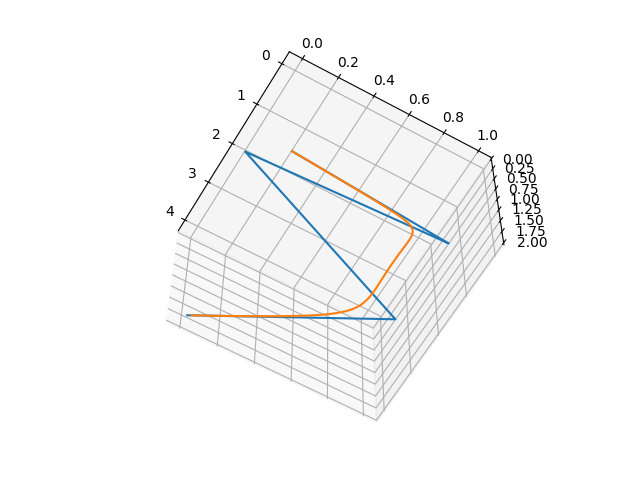

In [74]:

%matplotlib inline
%matplotlib widget

from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np

ax3d = plt.subplot(111, projection="3d")
ax3d.plot(x_list,y_list,z_list)
ax3d.plot(P[:,0],P[:,1],P[:,2])
ax3d.view_init(120, 30)

In [75]:
def CartesianTrajectory(X_list,W_list,Tf,N):
    X_list = np.array(X_list)
    size_X=len(X_list);
    print(X_list.shape)
    N = int(N)
    timegap = Tf / (N - 1.0)
    traj = [[None]] * N
    R_list=[]
    p_list =[]
    for i in range(size_X):
        R, p = TransToRp(X_list[i,:,:])
        R_list.append(R)
        p_list.append(p)
    bc = BezierCurve(p_list,W_list,N)
    for i in range(N):
        s_traj = Trajectory();
        s_traj.vo = 0;
        s_traj.ao =0;
        s_traj.af = 0;
        s_traj.vf =0;
        s_traj.so =0;
        s_traj.sf = 1;
        s_traj.amax = 50;
        s_traj.dmax = 50;
        s_traj.vmax = 10;
        s_traj.j = 1000;
        sg = ScurveGenerator([s_traj])
        sg.syncTime();
        sg.syncTargetTime(Tf);
        s_traj = sg.getTraj(0);
        val = sg.generate(s_traj,timegap*i)
        s = val[0]
        #sg.printAllTrajectory()
        #s = QuinticTimeScaling(Tf, timegap * i)
        P,dot_P,ddot_P = bc.get_bazier_curve_s(s);
        traj[i] \
        = np.r_[np.c_[np.array(np.eye(3)), \
                   np.array(P).T], \
                   [[0, 0, 0, 1]]]
        
    return np.array(traj)

In [76]:
X_list = [X1,X2,X3]
W_list = [1, 1,1]
traj = CartesianTrajectory(X_list,W_list,Tf,N)


(3, 4, 4)


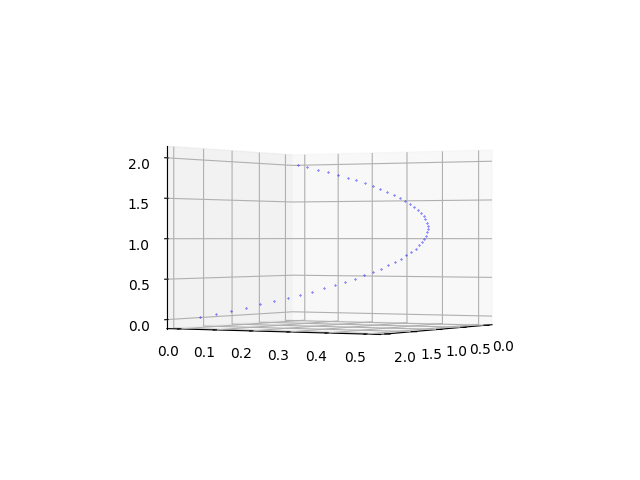

In [77]:
%matplotlib inline
%matplotlib widget

x_list = [x for x in traj[:,0,3]]
y_list = [y for y in traj[:,1,3]]
z_list = [z for z in traj[:,2,3]]
plt.clf()
ax3d = plt.subplot(111, projection="3d")
for i in range(0,len(x_list)-1,20):
    ax3d.scatter(x_list[i],y_list[i],z_list[i],s=0.1,c='b')    
ax3d.view_init(0, 30)
plt.show()


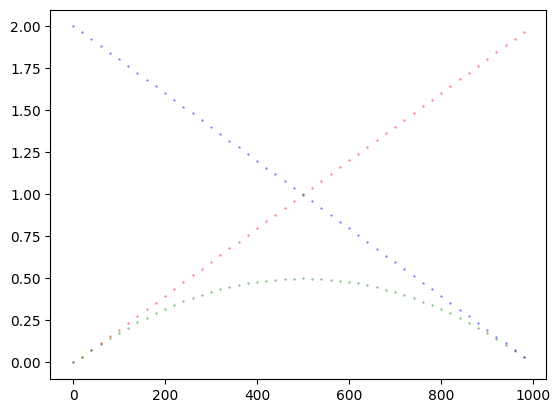

In [78]:
%matplotlib inline

from modern_robotics import *
from BezierCurve import *
import matplotlib.pyplot as plt
import numpy as np
from pyScurveGenerator import *
t_list = [i for i in range(0,len(x_list))]
for i in range(0,len(x_list)-1,20):
    plt.scatter(t_list[i],x_list[i],s=0.1,c='r')
    plt.scatter(t_list[i],y_list[i],s=0.1,c='g')
    plt.scatter(t_list[i],z_list[i],s=0.1,c='b')

In [92]:
A1 = np.eye(4)
A2 = np.eye(4)
A=np.r_[A1,A2]
B=np.c_[A1,A2]

print(A)
print(B)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]]


In [93]:
def QuinticVelTimeScaling(Tf, t):
    return 10 *3*1.0/Tf* (1.0 * t / Tf) ** 2 - 15 *4*1.0/Tf *(1.0 * t / Tf) ** 3 \
           + 6 *5*1.0/Tf* (1.0 * t / Tf) ** 4

In [94]:
def QuinticAccTimeScaling(Tf, t):
    return 10 *3*1.0/Tf*2*1.0/Tf* (1.0 * t / Tf)  - 15 *4*1.0/Tf*3*1.0/Tf*(1.0 * t / Tf) ** 2 \
           + 6 *5*1.0/Tf*4*1.0/Tf* (1.0 * t / Tf) ** 3

In [95]:



def CartesianScurveTrajectory(X_list,sg,Times,N):
    X_list = np.array(X_list)
    size_X=len(X_list);
    print(X_list.shape)
    N = int(N)
    traj_list = []
    dot_traj_list = []
    ddot_traj_list = []
    
    for i in range(0,size_X-1):
        Tf = Times[i]
        timegap = Tf / (N - 1.0)
        traj = [[None]] * N       
        dot_traj = [[None]] * N       
        ddot_traj = [[None]] * N       
        Rstart, pstart = TransToRp(X_list[i,:,:])
        Rend, pend = TransToRp(X_list[i+1,:,:])
        s_traj = sg.getTraj(0);
        for j in range(N):
            val = sg.generate(s_traj,timegap*j)
            s = val[0]
            sdot = val[1]
            sddot = val[2]
            #s = QuinticTimeScaling(Tf, timegap * j)
            #sdot = QuinticVelTimeScaling(Tf, timegap * j)
            #sddot = QuinticAccTimeScaling(Tf, timegap * j)
            #P,dot_P,ddot_P = bc.get_bazier_curve_s(s);
            Rs = Rstart@ MatrixExp3(MatrixLog3(np.array(Rstart).T@Rend)* s)
            dRds =(MatrixLog3(np.array(Rstart).T@Rend))@Rs
            d2Rds2 =(MatrixLog3(np.array(Rstart).T@Rend))@(MatrixLog3(np.array(Rstart).T@Rend))@Rs         
            traj[j] \
                = np.r_[np.c_[ Rs, \
                       s * np.array(pend) + (1 - s) * np.array(pstart)], \
                       [[0, 0, 0, 1]]]

            dot_traj[j] \
                = np.r_[np.c_[dRds*sdot, \
                       sdot * np.array(pend)  - sdot * np.array(pstart)], \
                       [[0, 0, 0, 1]]]
            ddot_traj[j] \
                = np.r_[np.c_[d2Rds2*sdot*sdot+dRds*sddot, \
                       sddot * np.array(pend)  - sddot * np.array(pstart)], \
                       [[0, 0, 0, 1]]]
            
        traj_list.append(traj)
        dot_traj_list.append(dot_traj)
        ddot_traj_list.append(ddot_traj)
        
    return np.reshape(np.array(traj_list),(-1,4,4)),np.reshape(np.array(dot_traj_list),(-1,4,4)),np.reshape(np.array(ddot_traj_list),(-1,4,4))

In [100]:
s_traj = Trajectory();
s_traj.vo = 0;
s_traj.ao =0;
s_traj.af = 0;
s_traj.vf =0;
s_traj.so =0;
s_traj.sf = 1;
s_traj.amax = 20;
s_traj.dmax = 20;
s_traj.vmax = 10;
s_traj.j = 100;
sg = ScurveGenerator([s_traj])
sg.syncTime();
sg.syncTargetTime(1);
#sg.printAllTrajectory();

        
pos_1 = [0,0,0]
pos_2 = [20,1,0]
pos_3 = [50,0,0]

X1 = np.eye(4)
X2 = np.eye(4)
X3 = np.eye(4)
theta = np.pi/2.0
X2[0:3,0:3] = np.array([[cos(theta) ,-sin(theta) ,0],[sin(theta), cos(theta), 0],[0 ,0 ,1]])

X1[0:3,3] = pos_1
X2[0:3,3] = pos_2
X3[0:3,3] = pos_3

X_list = [X1,X2,X3]
Times = [s_traj.tt,s_traj.tt,s_traj.tt]
N = 1000;
traj,dot_traj,ddot_traj =CartesianScurveTrajectory(X_list,sg,Times,N)


(3, 4, 4)


In [101]:
def diff_trajectory(val_list,alpha,dt):
    val_list = np.array(val_list)
    prev_val = val_list[0]
    prev_filtered_val = val_list[0]
    diff_val_list = []
    for i  in range(len(val_list)):
        val = val_list[i]
        diff_val = (val-prev_val)/dt;
        filtered_val = (alpha)*prev_filtered_val+ (1-alpha)*diff_val;
        diff_val_list.append(filtered_val)
        prev_filtered_val = filtered_val;
        prev_val = val;
    return np.array(diff_val_list)
        

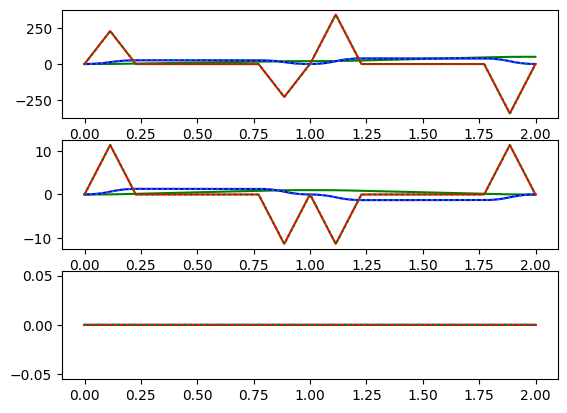

In [102]:
%matplotlib inline

dt = 0.001

x_list = [x for x in traj[:,0,3]]
diff_x_list = diff_trajectory(x_list,0.0,dt)
dx_list = [x for x in dot_traj[:,0,3]]
diff_dx_list = diff_trajectory(dx_list,0.0,dt)
ddx_list = [x for x in ddot_traj[:,0,3]]

y_list = [y for y in traj[:,1,3]]
diff_y_list = diff_trajectory(y_list,0.0,dt)
dy_list = [x for x in dot_traj[:,1,3]]
diff_dy_list = diff_trajectory(dy_list,0.0,dt)
ddy_list = [x for x in ddot_traj[:,1,3]]

z_list = [z for z in traj[:,2,3]]
diff_z_list = diff_trajectory(z_list,0.0,dt)
dz_list = [x for x in dot_traj[:,2,3]]
diff_dz_list = diff_trajectory(dz_list,0.0,dt)
ddz_list = [x for x in ddot_traj[:,2,3]]

t_list = [z*dt for z in range(0,len(x_list))]
plt.clf();
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)
ax1.plot(t_list,x_list,'g')
ax1.plot(t_list,dx_list,'b')
ax1.plot(t_list,ddx_list,'r')
ax1.plot(t_list,diff_x_list,':')
ax1.plot(t_list,diff_dx_list,'g:')

ax2.plot(t_list,y_list,'g')
ax2.plot(t_list,dy_list,'b')
ax2.plot(t_list,ddy_list,'r')
ax2.plot(t_list,diff_y_list,':')
ax2.plot(t_list,diff_dy_list,'g:')

ax3.plot(t_list,z_list,'g')
ax3.plot(t_list,dz_list,'b')
ax3.plot(t_list,ddz_list,'r')
ax3.plot(t_list,diff_z_list,':')
ax3.plot(t_list,diff_dz_list,'g:')
plt.show()

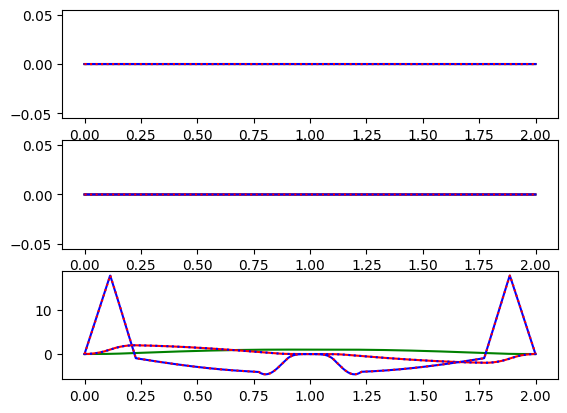

In [103]:
%matplotlib inline

so3_list = [ so3ToVec(np.array(R)) for R in traj[:,0:3,0:3]]
so3_list = np.array(so3_list)

dot_so3_list = [ so3ToVec(np.array(R)) for R in dot_traj[:,0:3,0:3]]
dot_so3_list = np.array(dot_so3_list)

ddot_so3_list = [ so3ToVec(np.array(R)) for R in ddot_traj[:,0:3,0:3]]
ddot_so3_list = np.array(ddot_so3_list)

r_list = [r for r in so3_list[:,0]]
dr_list = [r for r in dot_so3_list[:,0]]
ddr_list = [r for r in ddot_so3_list[:,0]]

diff_r_list = diff_trajectory(r_list,0.0,dt)
diff_dr_list = diff_trajectory(dr_list,0.0,dt)

p_list = [p for p in so3_list[:,1]]
dp_list = [r for r in dot_so3_list[:,1]]
ddp_list = [r for r in ddot_so3_list[:,1]]

diff_p_list = diff_trajectory(p_list,0.0,dt)
diff_dp_list = diff_trajectory(dp_list,0.0,dt)

y_list = [y for y in so3_list[:,2]]
dy_list = [y for y in dot_so3_list[:,2]]
ddy_list = [y for y in ddot_so3_list[:,2]]
diff_y_list = diff_trajectory(y_list,0.0,dt)
diff_dy_list = diff_trajectory(dy_list,0.0,dt)

plt.clf();
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)
ax1.plot(t_list,r_list,'g')
ax1.plot(t_list,dr_list,'r')
ax1.plot(t_list,ddr_list,'b')


ax1.plot(t_list,diff_r_list,'b:')
ax1.plot(t_list,diff_dr_list,'r:')



ax2.plot(t_list,p_list,'g')
ax2.plot(t_list,dp_list,'r')
ax2.plot(t_list,ddp_list,'b')

ax2.plot(t_list,diff_p_list,'b:')
ax2.plot(t_list,diff_dp_list,'r:')

ax3.plot(t_list,y_list,'g')
ax3.plot(t_list,dy_list,'r')
ax3.plot(t_list,ddy_list,'b')

ax3.plot(t_list,diff_y_list,'b:')
ax3.plot(t_list,diff_dy_list,'r:')

plt.show()

(2000,)


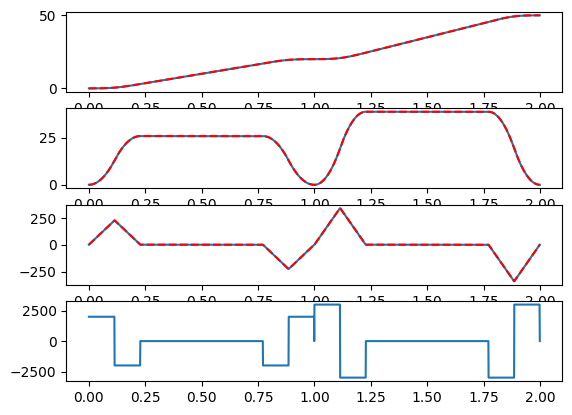

In [104]:
%matplotlib inline

s_traj = sg.getTraj(0);
N= 1000;
print(np.array(t_list).shape)
timegap = s_traj.tt / (N - 1.0)
s_list = [[None]] * 2*N       
ds_list = [[None]] * 2*N       
dds_list = [[None]] * 2*N       
ddds_list = [[None]] * 2*N    
t_list_ = [[None]] * 2*N       

for j in range(N):
    val = sg.generate(s_traj,timegap*j)
    s_list[j] = val[0]*(pos_2[0]-pos_1[0])
    ds_list[j] = val[1]*(pos_2[0]-pos_1[0])
    dds_list[j] = val[2]*(pos_2[0]-pos_1[0])
    ddds_list[j] = val[3]*(pos_2[0]-pos_1[0])
    t_list_[j] = timegap*j;
for j in range(N):
    val = sg.generate(s_traj,timegap*j)
    s_list[j+N] = val[0]*(pos_3[0]-pos_2[0])+(pos_2[0]-pos_1[0])
    ds_list[j+N] = val[1]*(pos_3[0]-pos_2[0])
    dds_list[j+N] = val[2]*(pos_3[0]-pos_2[0])
    ddds_list[j+N] = val[3]*(pos_3[0]-pos_2[0])
    t_list_[j+N] = timegap*j+s_traj.tt;    
s_list = np.array(s_list)
ds_list = np.array(ds_list)
dds_list = np.array(dds_list)
ddds_list = np.array(ddds_list)
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list,s_list)
ax1.plot(t_list,x_list,'r--',markersize=0.5)

ax2.plot(t_list,np.array(ds_list))
ax2.plot(t_list,dx_list,'r--',markersize=0.5)

ax3.plot(t_list,np.array(dds_list))
ax3.plot(t_list,ddx_list,'r--',markersize=0.5)

ax4.plot(t_list,ddds_list)
plt.show()



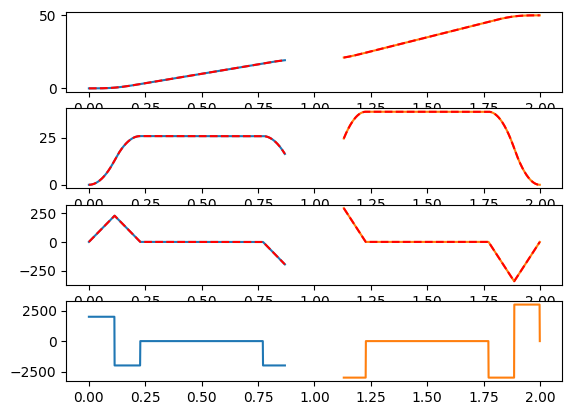

In [105]:
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
idx = 870
ax1.plot(t_list[0:idx],s_list[0:idx])
ax1.plot(t_list[0:idx],x_list[0:idx],'r--',markersize=0.5)

ax1.plot(t_list[-idx:],s_list[-idx:])
ax1.plot(t_list[-idx:],x_list[-idx:],'r--',markersize=0.5)


ax2.plot(t_list[0:idx],np.array(ds_list[0:idx]))
ax2.plot(t_list[0:idx],dx_list[0:idx],'r--',markersize=0.5)

ax2.plot(t_list[-idx:],np.array(ds_list[-idx:]))
ax2.plot(t_list[-idx:],dx_list[-idx:],'r--',markersize=0.5)

ax3.plot(t_list[0:idx],np.array(dds_list[0:idx]))
ax3.plot(t_list[0:idx],ddx_list[0:idx],'r--',markersize=0.5)

ax3.plot(t_list[-idx:],np.array(dds_list[-idx:]))
ax3.plot(t_list[-idx:],ddx_list[-idx:],'r--',markersize=0.5)

ax4.plot(t_list[0:idx],ddds_list[0:idx])
ax4.plot(t_list[-idx:],ddds_list[-idx:])

plt.show()



In [106]:
new_traj = Trajectory()
new_traj.so = 0
new_traj.sf = 1
new_traj.vo = dx_list[idx]
new_traj.vf = dx_list[-idx]
new_traj.ao = ddx_list[idx]
new_traj.af = ddx_list[-idx]
new_traj.amax = 1000
new_traj.dmax = 1000
new_traj.j = 20000
sg = ScurveGenerator([new_traj])
sg.syncTime()

#sg.printAllTrajectory()



In [107]:


print(new_traj.vo)
print(new_traj.vf)
print(new_traj.ao)
print(new_traj.af)


16.203172395158198
24.59884691313717
-196.8638223873036
292.2927305779523


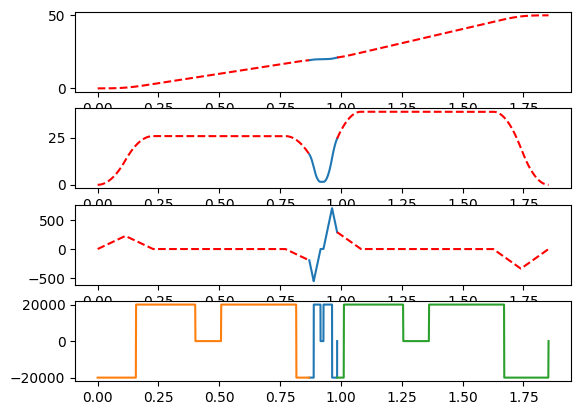

In [108]:
%matplotlib inline

pos_x_scale = 1

s_traj = sg.getTraj(0);
N= 1000;
timegap = s_traj.tt / (N - 1.0)
s_list = [[None]] * N       
ds_list = [[None]] * N       
dds_list = [[None]] * N       
ddds_list = [[None]] * N    
t_list_ = [[None]] * N       

for j in range(N):
    val = sg.generate(s_traj,timegap*j)
    s_list[j] = val[0]*(x_list[-idx]-x_list[idx])+x_list[idx]
    ds_list[j] = val[1]*(pos_x_scale)
    dds_list[j] = val[2]*(pos_x_scale)
    ddds_list[j] = val[3]*(pos_x_scale)
    t_list_[j] = timegap*j+t_list[idx];
s_list = np.array(s_list)
t_list_= np.array(t_list_)
t_list = np.array(t_list)
plt.clf();
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)
ax1.plot(t_list_,s_list)
ax1.plot(t_list[0:idx],x_list[0:idx],'r--',markersize=0.5)
ax1.plot(t_list[-idx:]-t_list[-idx]+t_list_[-1],x_list[-idx:],'r--',markersize=0.5)


ax2.plot(t_list_,np.array(ds_list))
ax2.plot(t_list[0:idx],dx_list[0:idx],'r--',markersize=0.5)
ax2.plot(t_list[-idx:]-t_list[-idx]+t_list_[-1],dx_list[-idx:],'r--',markersize=0.5)

ax3.plot(t_list_,np.array(dds_list))
ax3.plot(t_list[0:idx],ddx_list[0:idx],'r--',markersize=0.5)
ax3.plot(t_list[-idx:]-t_list[-idx]+t_list_[-1],ddx_list[-idx:],'r--',markersize=0.5)

ax4.plot(t_list_,np.array(ddds_list))
ax4.plot(t_list[0:idx],ddds_list[0:idx])
ax4.plot(t_list[-idx:]-t_list[-idx]+t_list_[-1],ddds_list[-idx:])
plt.show()
